Analyzing 6056 lines...


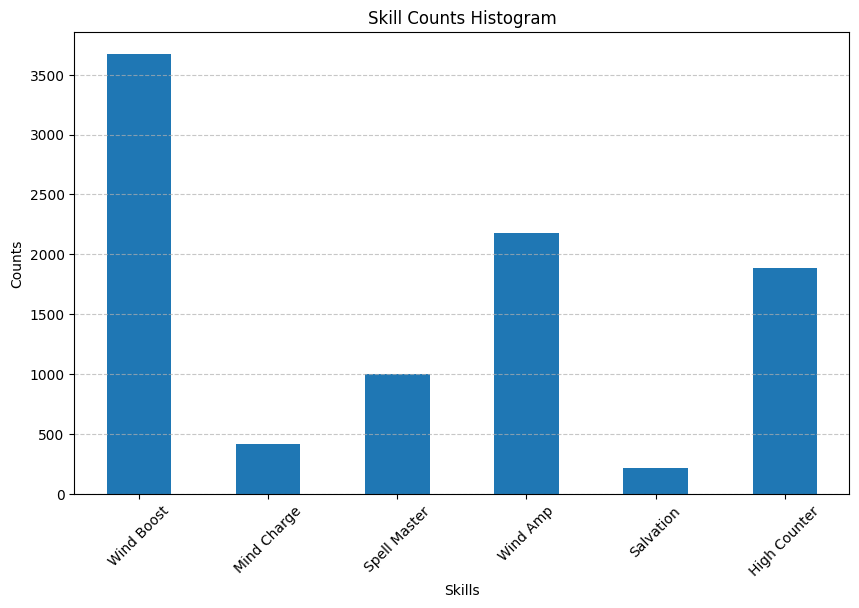

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the contents of the file into a string
with open('/home/eduardo/Documents/Persona3/AutoTelos/chi_you_probability/helel_metatron_loki.txt', 'r') as f:
    txt_data = f.read()

# Filter out lines with 'desired skills found'
filtered_lines = [line for line in txt_data.strip().split('\n') if 'desired skills found' not in line]

# Clean up each line by removing the "INFO:root:" prefix
clean_lines = [line.replace("INFO:root:", "").strip() for line in filtered_lines]

# Convert string representations of lists into actual lists
skills_data = [eval(skill_list) for skill_list in clean_lines]

# Create a DataFrame with each skill in its own column
skills_df = pd.DataFrame(skills_data, columns=[f'Skill_{i+1}' for i in range(5)])

# Count the number of lines in the DataFrame
total_lines = skills_df.shape[0]

def analyze_skills(skills_df, num_lines):
    # Limit the DataFrame to the specified number of lines
    limited_df = skills_df.head(num_lines)

    # List of skills to count
    skills_to_count = ['Wind Boost', 'Mind Charge', 'Spell Master', 'Wind Amp', 'Salvation', 'High Counter']

    # Initialize a dictionary to hold the count for each skill
    skill_counts = {skill: 0 for skill in skills_to_count}

    # Iterate through the limited DataFrame and count each occurrence of the skills
    for skill in skills_to_count:
        skill_counts[skill] = limited_df.isin([skill]).sum().sum()

    # Convert the skill_counts dictionary to a Series for easier plotting
    skill_counts_series = pd.Series(skill_counts)

    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    skill_counts_series.plot(kind='bar')
    plt.title('Skill Counts Histogram')
    plt.xlabel('Skills')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    return skill_counts

# Example usage of the function with a specific number of lines
for i in range(total_lines,total_lines + 1):
    print(f'Analyzing {i} lines...')
    skill_counts = analyze_skills(skills_df, i)
    print()


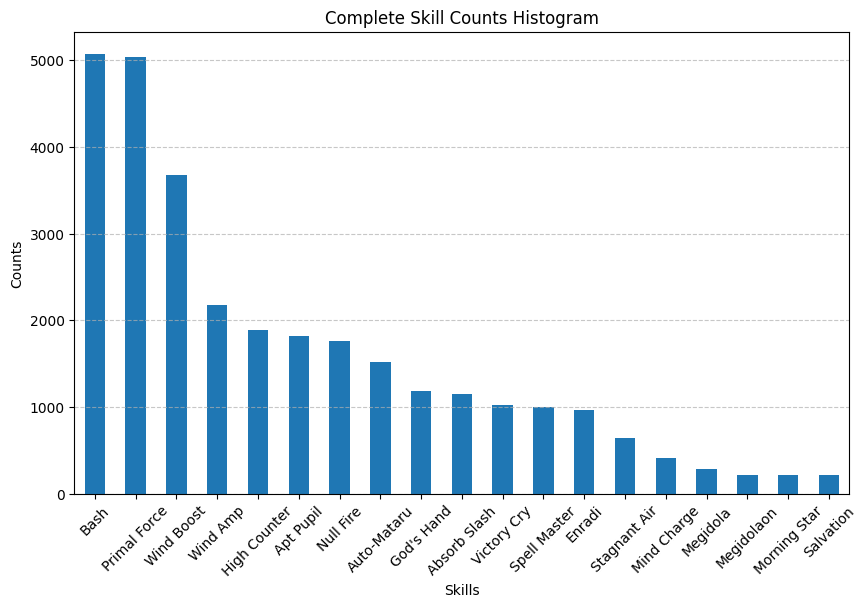

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming skills_df is already defined and loaded as per your previous code

# Flatten the DataFrame to get a list of all skills
all_skills = skills_df.values.flatten()

# Convert the list of all skills into a Series
skills_series = pd.Series(all_skills)

# Count the occurrences of each unique skill
skill_counts = skills_series.value_counts()

# Plotting the histogram
plt.figure(figsize=(10, 6))
skill_counts.plot(kind='bar')
plt.title('Complete Skill Counts Histogram')
plt.xlabel('Skills')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


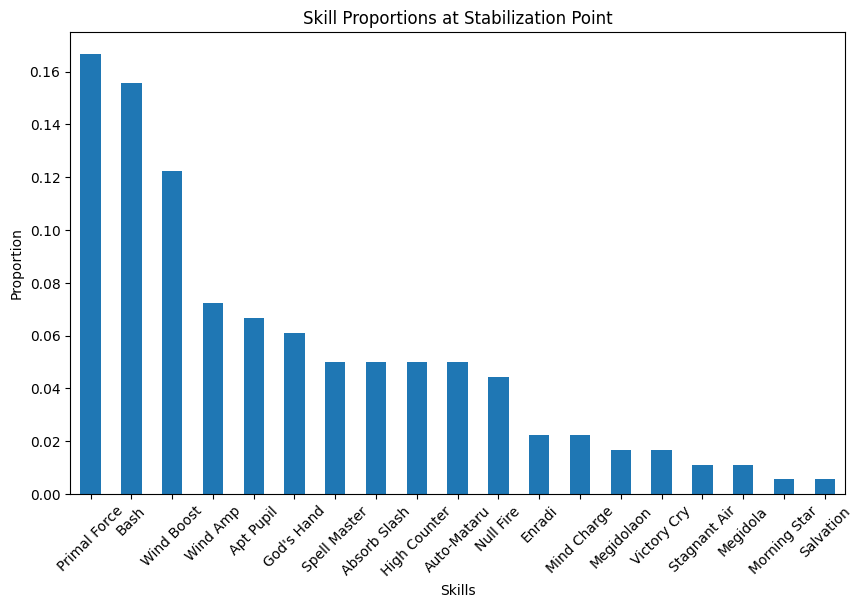

Stabilization Point: 179


In [3]:
import pandas as pd
import numpy as np

def analyze_stabilization(df, step=100, threshold=0.01):
    """
    Analyze the stabilization of skill proportions in the DataFrame.

    :param df: DataFrame with skill occurrences.
    :param step: Number of rows to incrementally add for each subset analysis.
    :param threshold: Proportion change threshold to determine stabilization.
    :return: Stabilization point row index.
    """
    # Flatten the DataFrame to get a list of all skills
    all_skills = df.values.flatten()
    
    # Initialize variables
    last_proportions = None
    stabilization_point = None

    # Incrementally analyze the DataFrame
    for end in range(step, len(all_skills) + step, step):
        subset_skills = all_skills[:end]
        counts = pd.Series(subset_skills).value_counts()
        proportions = counts / counts.sum()
        
        # Skip the first iteration since there's no previous data to compare
        if last_proportions is not None:
            # Calculate the maximum proportion change for any skill
            proportion_changes = np.abs(proportions - last_proportions).fillna(0)
            max_change = proportion_changes.max()

            # Check if the maximum change is below the threshold
            if max_change < threshold:
                stabilization_point = end - step  # Use the previous end point as the stabilization point
                break
        
        last_proportions = proportions

    # Plotting the final proportions for visualization
    proportions.plot(kind='bar', figsize=(10, 6))
    plt.title('Skill Proportions at Stabilization Point')
    plt.xlabel('Skills')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.show()

    return stabilization_point

# Flatten the DataFrame to create a single list of skills
skills_list = skills_df.values.flatten()

# Call the function to analyze stabilization
stabilization_point = analyze_stabilization(skills_df, step=1, threshold=0.001)
print(f'Stabilization Point: {stabilization_point}')


In [4]:
import pandas as pd


df = pd.read_csv("/home/eduardo/Documents/Persona3/AutoTelos/skills_list/skills.csv")


skill_type_dict = df.set_index('skill')['type'].to_dict()

skill_rank_dict = df.set_index('skill')['rank'].to_dict()

# given a skill name return the skill type
def get_skill_type(skill_name):
    return skill_type_dict[skill_name]

def get_skill_rank(skill_name):
    return skill_rank_dict[skill_name]

# load '/home/eduardo/Documents/Persona3/AutoTelos/inheritance_calculator/inheritance.csv' into a dataframe
inheritance_df = pd.read_csv('/home/eduardo/Documents/Persona3/AutoTelos/inheritance_calculator/inheritance.csv')
# load '/home/eduardo/Documents/Persona3/AutoTelos/inheritance_calculator/personas_inheritance.csv' into a dataframe
persona_inheritance_df = pd.read_csv('/home/eduardo/Documents/Persona3/AutoTelos/inheritance_calculator/personas_inheritance.csv')

def get_persona_inheritance_type(persona_name):
    return persona_inheritance_df.loc[persona_inheritance_df['Persona'] == persona_name, 'Type'].iloc[0]



# Convert the DataFrame to a dictionary where each key is an inheritance type
# and its value is another dictionary of skill types and their probabilities.
inheritance_dict = inheritance_df.set_index('Inheritance Type').T.to_dict('dict')



# given a skill type return the skill inheritance probability for a given persona type
def get_inheritance_probability(skill_type, persona_inheritance_type):
    # Access the nested dictionary directly for the value
    # Check if the persona_inheritance_type exists to avoid KeyErrors
    if persona_inheritance_type in inheritance_dict:
        # Return the probability value for the given skill_type and persona_inheritance_type
        return inheritance_dict[persona_inheritance_type].get(skill_type, 0)  # Returns 0 if skill_type is not found

In [5]:
skill_counts_list = list(skill_counts.to_dict().keys())

ranks = []

dict_skill_to_rank = {}

for s in skill_counts_list:
    print(s, get_inheritance_probability(get_skill_type(s), get_persona_inheritance_type('orpheus telos')), get_skill_rank(s))
    ranks.append(get_skill_rank(s))
    dict_skill_to_rank[s] = get_skill_rank(s)

ranks = list(set(ranks))

print(ranks)

print(dict_skill_to_rank)




Bash 1.0 1
Primal Force 1.0 8
Wind Boost 1.0 2
Wind Amp 1.0 4
High Counter 1.0 5
Apt Pupil 1.0 3
Null Fire 1.0 5
Auto-Mataru 1.0 6
God's Hand 1.0 8
Absorb Slash 1.0 8
Victory Cry 1.0 9
Spell Master 1.0 9
Enradi 1.0 2
Stagnant Air 1.0 3
Mind Charge 1.0 5
Megidola 1.0 7
Megidolaon 1.0 8
Morning Star 1.0 9
Salvation 1.0 9
[1, 2, 3, 4, 5, 6, 7, 8, 9]
{'Bash': 1, 'Primal Force': 8, 'Wind Boost': 2, 'Wind Amp': 4, 'High Counter': 5, 'Apt Pupil': 3, 'Null Fire': 5, 'Auto-Mataru': 6, "God's Hand": 8, 'Absorb Slash': 8, 'Victory Cry': 9, 'Spell Master': 9, 'Enradi': 2, 'Stagnant Air': 3, 'Mind Charge': 5, 'Megidola': 7, 'Megidolaon': 8, 'Morning Star': 9, 'Salvation': 9}


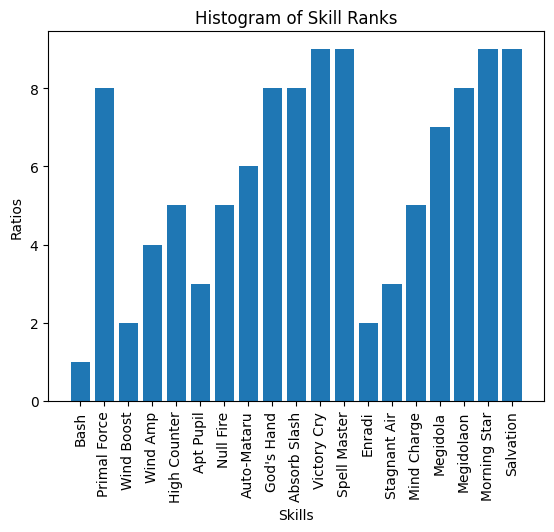

In [6]:
# Create lists of keys and values
skills = list(dict_skill_to_rank.keys())
ranks = list(dict_skill_to_rank.values())

# Create the histogram
plt.bar(skills, ranks)

# Add labels and title
plt.xlabel('Skills')
plt.ylabel('Ratios')
plt.title('Histogram of Skill Ranks')
plt.xticks(rotation=90)

# Show the plot
plt.show()